In [2]:
#Import Dependencies
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [3]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
target_terms = ("@BBCNorthAmerica", "@CBS", "@CNN", "@FoxNews", "@nytimes")

tweets_list = []
search_term_list = []

In [7]:
for target in target_terms:
# Iterate through the first 100 tweets
    for tweet in tweepy.Cursor(api.user_timeline, target, tweet_mode='extended').items(100):
        tweets_list.append(tweet)    
        search_term_list.append(target)

In [9]:
user_list = []
tweet_text_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
time_stamp_list = []

# Loop through all tweets
for tweet in tweets_list:
    
        tweet_user = tweet.user.screen_name
        tweet_text = tweet.full_text
        tweet_time = tweet.created_at
        results = analyzer.polarity_scores(tweet_text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list
        user_list.append(tweet_user)
        tweet_text_list.append(tweet_text)
        time_stamp_list.append(tweet_time)
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [1]:
news_tweets_df = pd.DataFrame({
    'User': user_list,
    'Tweet Text': tweet_text_list,
    'Tweet Date': time_stamp_list,
    'Compound Score': compound_list,
    'Positive': positive_list,
    'Neutral': negative_list,
    'Negative': neutral_list
})


news_tweets_df.to_csv('news_sentiment.csv')

NameError: name 'pd' is not defined

BBCNorthAmerica    100
CBS                100
FoxNews            100
nytimes            100
CNN                100
Name: User, dtype: int64

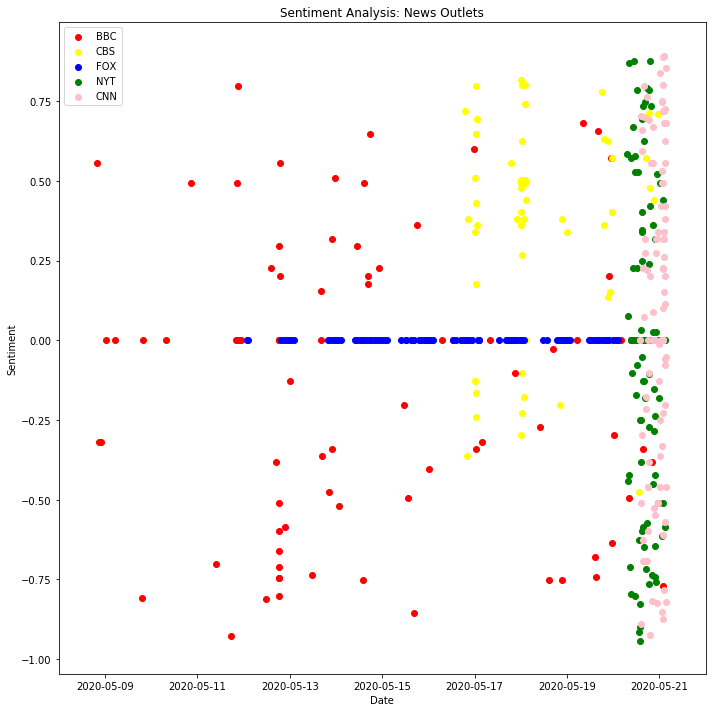

<Figure size 432x288 with 0 Axes>

In [39]:
#Sort by date  
news_tweets_df.sort_values(by='Tweet Date', inplace=True)

#subplots 
BBC = news_tweets_df.loc[news_tweets_df['User'] == 'BBCNorthAmerica', :]
CBS = news_tweets_df.loc[news_tweets_df['User'] == 'CBS', :]
FOX = news_tweets_df.loc[news_tweets_df['User'] == 'FoxNews', :]
NYT = news_tweets_df.loc[news_tweets_df['User'] == 'nytimes', :]
CNN = news_tweets_df.loc[news_tweets_df['User'] == 'CNN', :]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(BBC['Tweet Date'],BBC['Compound Score'],color = 'red',label='BBC')
ax.scatter(CBS['Tweet Date'],CBS['Compound Score'],color = 'yellow',label='CBS')
ax.scatter(FOX['Tweet Date'],FOX['Compound Score'],color = 'blue',label='FOX')
ax.scatter(NYT['Tweet Date'],NYT['Compound Score'],color = 'green',label='NYT')
ax.scatter(CNN['Tweet Date'],CNN['Compound Score'],color = 'pink',label='CNN')

ax.set_xlim([dt.date(2020,5,8),dt.date(2020,5,22)])
ax.set(title='Sentiment Analysis: News Outlets', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show() 

plt.savefig('Twitter_scatter.png')


In [79]:
BBC = news_tweets_df.loc[news_tweets_df['User'] == 'BBCNorthAmerica', :]
CBS = news_tweets_df.loc[news_tweets_df['User'] == 'CBS', :]
FOX = news_tweets_df.loc[news_tweets_df['User'] == 'FoxNews', :]
NYT = news_tweets_df.loc[news_tweets_df['User'] == 'nytimes', :]
CNN = news_tweets_df.loc[news_tweets_df['User'] == 'CNN', :]

BBC_avg =BBC['Compound Score'].mean()
CBS_avg =CBS['Compound Score'].mean()
FOX_avg =FOX['Compound Score'].mean()
NYT_avg =NYT['Compound Score'].mean()
CNN_avg =CNN['Compound Score'].mean()

aggregate= [{'BBC':BBC_avg,
                 'CBS':CBS_avg,
                 'FOX':FOX_avg,
                 'NYT':NYT_avg,
                 'CNN':CNN_avg}]
aggregate_df = pd.DataFrame(aggregate).T

aggregate_df=aggregate_df.rename(columns={0: "AVG Sentiment"})
aggregate_df =aggregate_df.reset_index()

<BarContainer object of 5 artists>

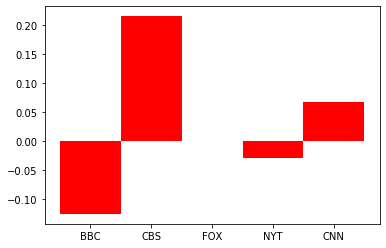

In [80]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(aggregate_df['index'], aggregate_df['AVG Sentiment'], width=1, color='r')
#ax.bar(x, positive_data, width=1, color='b')

,index,AVG Sentiment
0,BBC,-0.125887
1,CBS,0.215095
2,FOX,0.000000
3,NYT,-0.029579
4,CNN,0.067782


#### Noteable Trends 
* FOX news is shockingly neutral 
* NYT and CNN tweet significantly more than the other news accounts 
* CBS tends to use mor psitive words to report the news